In [31]:
import ccxt
import pandas
import matplotlib
import datetime
import calendar

In [32]:
SYMBOL = "BTC/USDT"
TIME_FRAME = "1m"
# 現在時刻のUTC naiveオブジェクト
now = datetime.datetime.now(datetime.timezone.utc)

# UTC naiveオブジェクト -> UnixTime
unixtime = calendar.timegm(now.utctimetuple())

# 5分前のUnixTime(ミリ秒)
since = (unixtime - 60 * 5) * 1000
LIMIT = 30

In [33]:
exchange = ccxt.bybit()
tickers = exchange.fetch_ohlcv(symbol=SYMBOL, timeframe=TIME_FRAME, since=since, limit=LIMIT)

In [34]:
COLUMNS = ["date", "open", "high", "low", "close", "volume"]

chart = pandas.DataFrame(tickers, columns=COLUMNS)
chart = chart.drop(columns="volume", axis=1)
chart["date"] = pandas.to_datetime(chart["date"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Tokyo")
chart.set_index("date", inplace=True)
chart.head()

,open,high,low,close
date,,,,
2024-03-23 13:55:00+09:00,63930.35,63936.16,63891.32,63908.02
2024-03-23 13:56:00+09:00,63908.02,63908.02,63844.01,63851.05
2024-03-23 13:57:00+09:00,63851.05,63881.16,63851.05,63875.59
2024-03-23 13:58:00+09:00,63875.59,63888.41,63848.59,63876.93
2024-03-23 13:59:00+09:00,63876.93,63885.96,63874.09,63885.96


<Axes: xlabel='date'>

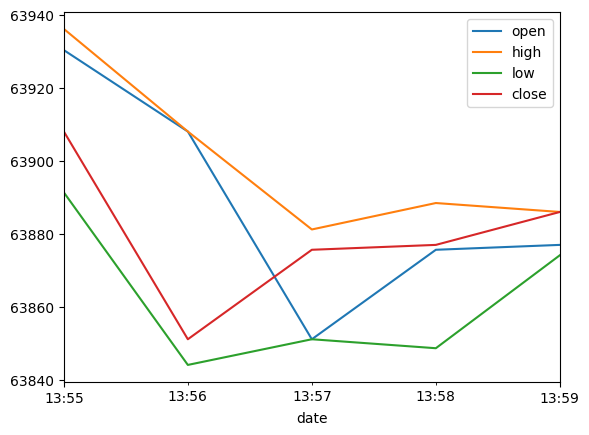

In [35]:
chart.plot()